# 01 多项式回归(Polynomial Regression)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [ ]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [ ]:
plt.scatter(x, y)
plt.show()

尝试线性回归

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
y_predict = lin_reg.predict(X)

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_predict, color='r')
plt.show()

## 解决方案 添加一个特征

In [ ]:
(X**2).shape

In [ ]:
X2 = np.hstack([X, X**2])

In [ ]:
X2.shape

In [ ]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_predict2, color='r')
plt.show()
# x的顺序是乱的

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [ ]:
lin_reg2.coef_

In [ ]:
lin_reg2.intercept_

# 02 scikit-learn中的多项式回归于pipeline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [ ]:
X2.shape

In [ ]:
X2[:5,:]

In [ ]:
X[:5,:]

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

In [ ]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [ ]:
lin_reg2.coef_

In [ ]:
lin_reg2.intercept_

## 关于PolynomialFeature

In [ ]:
X = np.arange(1,11).reshape(-1,2)

In [ ]:
X.shape

In [ ]:
X

In [ ]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [ ]:
X2

### degree=3时

PolynomialFeatures(degree=3)

$$x_{1}, x_{2}  \longrightarrow  \begin{aligned}
&1, x_{1}, x_{2}\\
&x_{1}^{2}, x_{2}^{2}, x_{1} x_{2}\\
&x_{1}^{3}, x_{2}^{3}, x_{1}^{2} x_{2}, x_{1} x_{2}^{2}
\end{aligned}$$

In [ ]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)

In [ ]:
X3.shape

In [ ]:
X3

### Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt


x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [3]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

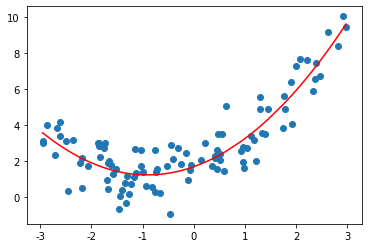

In [4]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

# 03 过拟合与欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

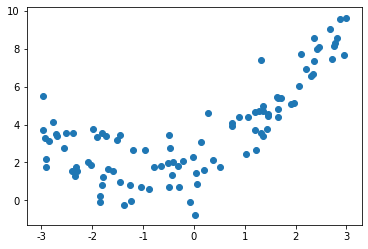

In [3]:
plt.scatter(x, y)
plt.show()

## 使用线性回归

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.4953707811865009

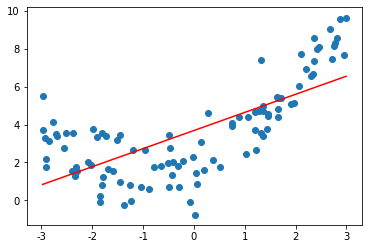

In [5]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

3.0750025765636577

## 使用多项式回归

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [8]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [9]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

1.0987392142417856

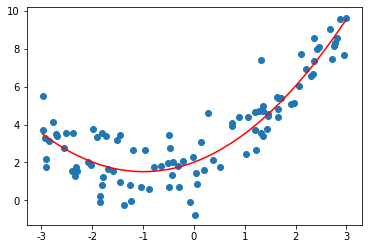

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

In [11]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X,y)

y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

1.050846676376417

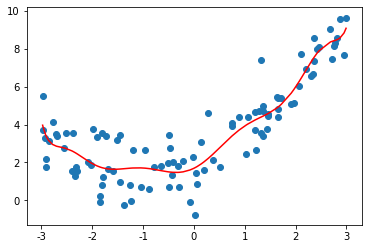

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

In [13]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6828361184883818

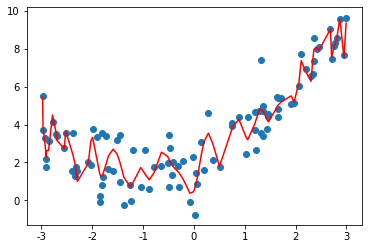

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()

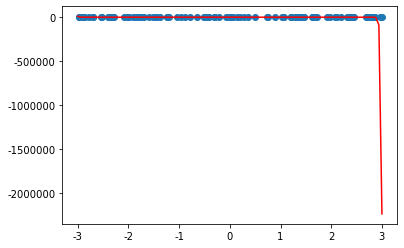

In [17]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.show()

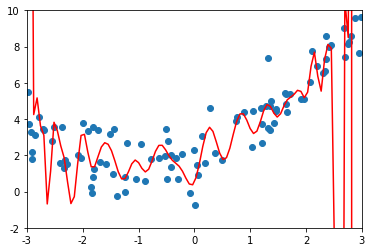

In [24]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, -2, 10])
plt.show()

# 04 为什么要训练数据集与测试数据集

## $\color{red}{模型泛化能力}$

### train test split的意义

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_predict = lin_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.2199965269396573

In [28]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X_train, y_train)
y2_predict = poly2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

0.8035641056297901

In [29]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(X_train, y_train)
y10_predict = poly10_reg.predict(X_test)
mean_squared_error(y_test, y10_predict)

0.9212930722150715

In [31]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X_train, y_train)
y100_predict = poly100_reg.predict(X_test)
mean_squared_error(y_test, y100_predict)

13453914822.818348

- 欠拟合 underfitting
    - 算法所训练的模型不能完整表述数据关系
- 过拟合 overfitting
    - 算法所训练的模型过多的表达了数据间的噪音关系

- 测试集的意义
    - 寻找泛化能力最好的地方

# 05 学习曲线

## 模型复杂度曲线
寻找泛化能力最好的地方
![](./picture/learning_curve.png)

## 学习曲线
随着训练样本的逐渐增多，算法训练出的模型的表现能力。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

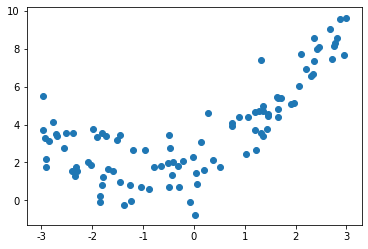

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [5]:
X_train.shape

(75, 1)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []
for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

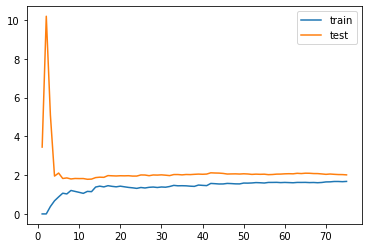

In [9]:
plt.plot([i for i in range(1,76)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1,76)], np.sqrt(test_score), label='test')
plt.legend()
plt.show()

In [12]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):

    train_score = []
    test_score = []
    for i in range(1, 76):
        
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))

        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))
    plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label='test')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()

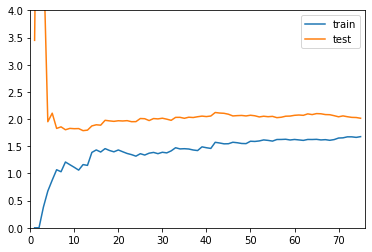

In [13]:
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)# 欠拟合

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

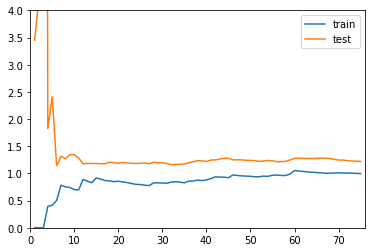

In [15]:
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg, X_train, X_test, y_train, y_test)

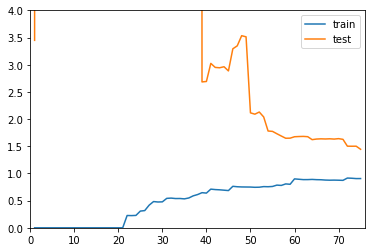

In [16]:
poly20_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly20_reg, X_train, X_test, y_train, y_test)# 过拟合

# 06 验证数据集与交叉验证

## 交叉验证(Cross Validation)

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=666)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 3
Best P = 4
Best Score = 0.9860917941585535


In [5]:
from sklearn.model_selection import cross_val_score

knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, X_train, y_train)

array([0.99537037, 0.98148148, 0.97685185, 0.97674419, 0.97209302])

### 使用交叉验证

In [6]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k = 0, 0, 0

for k in range(2, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=k, p=p)
        scores = cross_val_score(knn_clf, X_train, y_train)
        score = np.mean(scores)
        if score > best_score:
            best_score, best_p, best_k = score, p, k
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 2
Best Score = 0.9851507321274763


In [7]:
best_knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=2, p=2)

best_knn_clf.fit(X_train, y_train)
best_knn_clf.score(X_test, y_test)

0.980528511821975

### 回顾网格搜索

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights': ['distance'],
    'n_neighbors': [i for i in range(2, 11)],
    'p': [j for j in range(1, 6)]
}]

grid_search = GridSearchCV(knn_clf, param_grid, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:   27.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=5,
                                            weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [11]:
grid_search.best_score_

0.9851507321274763

In [12]:
grid_search.best_params_

{'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

In [13]:
best_knn_clf = grid_search.best_estimator_
best_knn_clf.score(X_test, y_test)

0.980528511821975

### k-folds 交叉验证
把训练集分成k份，称为k-folds cross validation
- 缺点：每次训练k个模型，相当于整体性能满了k倍

### 留一法 LOO-CV
把训练数据集分成m份，m-1份用于训练，然后预测剩下的一份样本的准确率，
Leave-One-Out Cross Validation
- 优点：将完全不受随机的影响，最接近模型真正的性能指标
- 缺点：计算量巨大

# 07 偏差方差权衡( Bias Variance Trade off )

## 偏差和方差
<img src='./picture/Bias_Variance.png' title="Bias & Variance" width="300" height="300">

## 模型误差

$$模型误差 = 偏差(Bias) + 方差(Variance) + 不可避免的误差$$

导致偏差的主要原因：
- 对问题本身的假设不正确
    - 如：非线性数据使用线性回归
- 欠拟合

导致方差的主要原因：
- 数据的一点点扰动都会较大地影响模型
- 通常原因，使用的模型太复杂。
    - 如：高阶多项式回归
- 过拟合

偏差和方差
- 有一些算法天生是高方差的算法，如kNN。
    - 非参数学习通常都是高方差算法。因为不对数据进行任何的假设
- 有一些算法天生是高偏差的算法，如线性回归。
    - 参数学习通常都是高偏差算法。因为堆数据具有极强的假设
- 大多数算法具有相应的参数，可以调整偏差和方差
    - 如，kNN中的k
    - 如，线性回归中使用多项式回归的degree
- 偏差和方差通常是矛盾的
    - 降低偏差，会提高方差。
    - 降低方差，会提高偏差。

$\color{red}{机器学习的主要挑战，来自于方差！}$

解决高方差的通常手段：
- 降低模型复杂度
- 减少数据维度；降噪
- 增加样本数
- 使用验证集
- $\color{#D02090}{模型的正则化}$

# 08 模型泛化与岭回归

## 模型正则化 Regularization
限制参数的大小

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", lin_reg)
    ])

In [3]:
from sklearn.metrics import mean_squared_error

poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)

y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)

0.6828361184883818

In [4]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly100_reg.predict(X_plot)

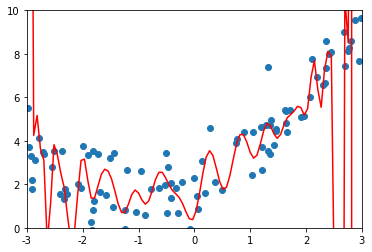

In [5]:
plt.scatter(x, y)
plt.plot(X_plot[:, 0], y_plot, color='r')
plt.axis([-3, 3, 0, 10])
plt.show()

In [7]:
lin_reg.coef_.shape

(101,)

### 模型正则化 Regularization

$$目标：使\sum_{i=1}^{m}\left(y^{(i)}-\theta_{0}-\theta_{1} X_{1}^{(i)}-\theta_{2} X_{2}^{(i)}-\ldots-\theta_{n} X_{n}^{(i)}\right)^{2} 尽可能小$$
$$目标：使J(\theta)=\operatorname{MSE}(y, \hat{y} ; \theta)尽可能小$$
$$\downarrow$$
$$加入模型正则化，目标：使J(\theta)=M S E(y, \hat{y} ; \theta)+\alpha \frac{1}{2} \sum_{i=1}^{n} \theta_{i}^{2}尽可能小$$

### 岭回归 Ridge Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

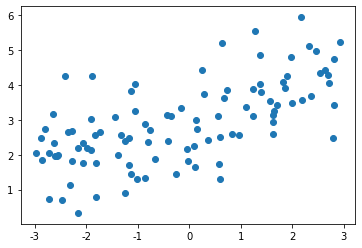

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

167.9401086890128

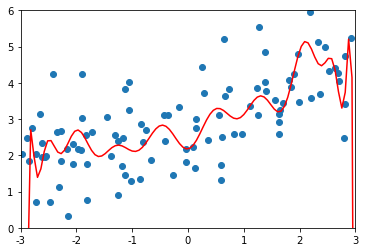

In [8]:
X_plot = np.linspace(-3,3,100).reshape(100,1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x,y)
plt.plot(X_plot[:,0],y_plot,color='r')
plt.axis([-3,3,0,6])
plt.show()

In [9]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

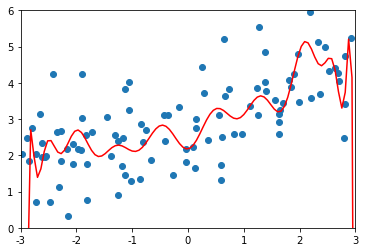

In [10]:
plot_model(poly_reg)

使用岭回归

In [12]:
from sklearn.linear_model import Ridge


def RidgeRegression(degree, alpha):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("ridge_reg", Ridge(alpha=alpha))])

In [15]:
ridge1_reg = RidgeRegression(20, 0.0001)
ridge1_reg.fit(X_train, y_train)

y1_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.3233492754155471

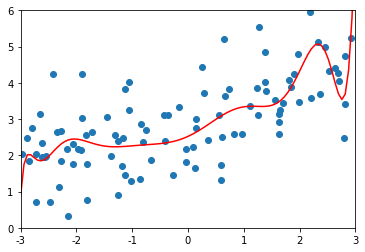

In [16]:
plot_model(ridge1_reg)

In [17]:
ridge2_reg = RidgeRegression(20,1)
ridge2_reg.fit(X_train,y_train)

y2_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

1.1888759304218448

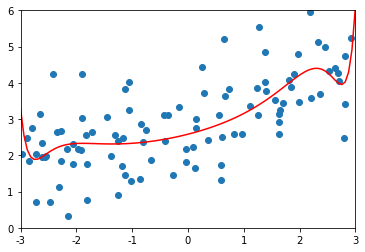

In [18]:
plot_model(ridge2_reg)

In [19]:
ridge3_reg = RidgeRegression(20,100)
ridge3_reg.fit(X_train,y_train)

y3_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test,y3_predict)

1.3196456113086197

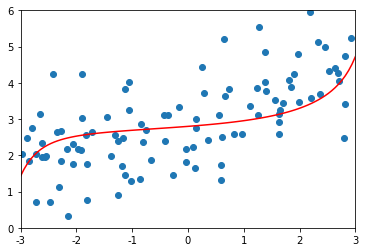

In [20]:
plot_model(ridge3_reg)

In [21]:
ridge4_reg = RidgeRegression(20,1000000)
ridge4_reg.fit(X_train,y_train)

y4_predict = ridge4_reg.predict(X_test)
mean_squared_error(y_test,y4_predict)

1.8404103153255003

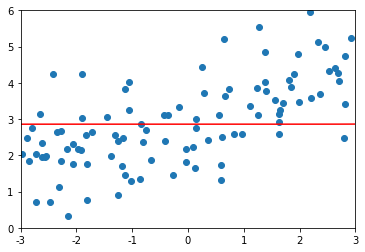

In [22]:
plot_model(ridge4_reg)

# 09 LASSO

LASSO Regularization

LASSO ： Least Absolute Shrinkage and Selection Operator

$$目标： 使J(\theta)=\operatorname{MSE}(y, \hat{y} ; \theta)+\alpha \sum_{i=1}^{n}\left|\theta_{i}\right| 尽可能小$$

LASSO 趋向于使得一部分theta值变为0。所以可以作为特征选择用。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

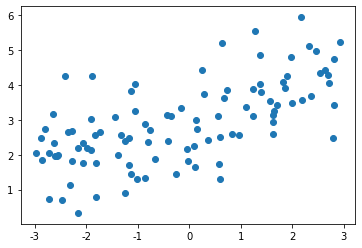

In [2]:
plt.scatter(x, y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


def PolynomialRegression(degree):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())])

In [5]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

167.9401086890128

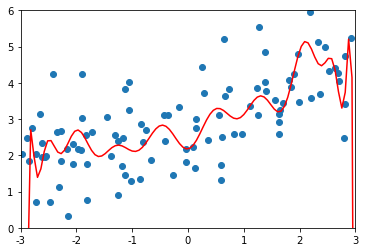

In [6]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:, 0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()
plot_model(poly_reg)

### LASSO

In [7]:
from sklearn.linear_model import Lasso


def LassoRegression(degree, alpha):
    return Pipeline([("poly", PolynomialFeatures(degree=degree)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", Lasso(alpha=alpha))])

In [8]:
lasso1_reg = LassoRegression(20, 0.01)
lasso1_reg.fit(X_train, y_train)

y1_predict = lasso1_reg.predict(X_test)
mean_squared_error(y_test, y1_predict)

1.1496080843259964

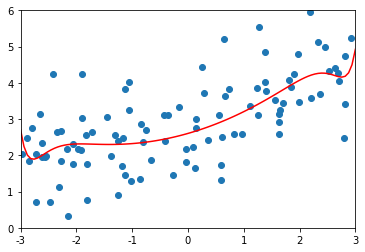

In [9]:
plot_model(lasso1_reg)

In [11]:
lasso2_reg = LassoRegression(20, 0.1)
lasso2_reg.fit(X_train, y_train)

y2_predict = lasso2_reg.predict(X_test)
mean_squared_error(y_test, y2_predict)

1.1213911351818648

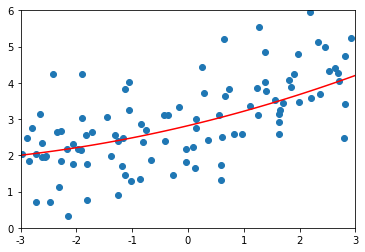

In [12]:
plot_model(lasso2_reg)

In [13]:
lasso3_reg = LassoRegression(20, 1)
lasso3_reg.fit(X_train, y_train)

y3_predict = lasso3_reg.predict(X_test)
mean_squared_error(y_test, y3_predict)

1.8408939659515595

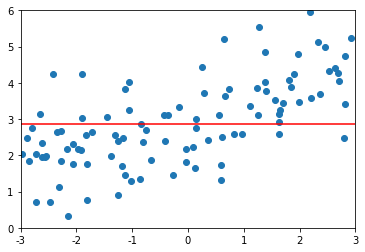

In [14]:
plot_model(lasso3_reg)